In [1]:
!pip install kneed

In [2]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using Device: {device}')

Using Device: cuda


In [3]:
import pandas as pd
import numpy as np
df_2022 = pd.read_csv('survey_results_public2022.csv').drop(['ResponseId'], axis=1).drop_duplicates()
df_2023 = pd.read_csv('survey_results_public2023.csv').drop(['ResponseId'], axis=1).drop_duplicates()
df_2024 = pd.read_csv('survey_results_public2024.csv').drop(['ResponseId'], axis=1).drop_duplicates()

df_2022['Year'] = 2022
df_2023['Year'] = 2023
df_2024['Year'] = 2024

common_columns = list(set(df_2022.columns).intersection(df_2023.columns).intersection(df_2024.columns))

data = pd.concat([df_2022, df_2023, df_2024])

data = data[common_columns]

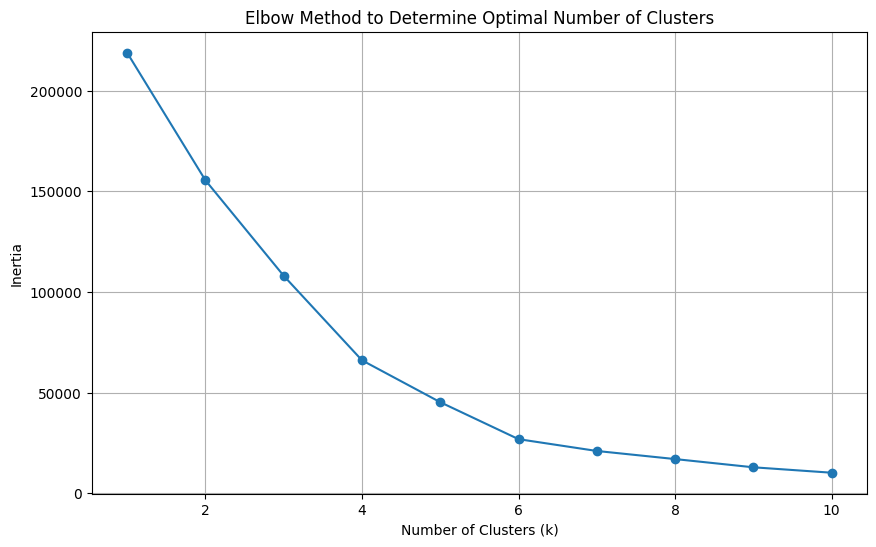

The optimal number of clusters is: 4


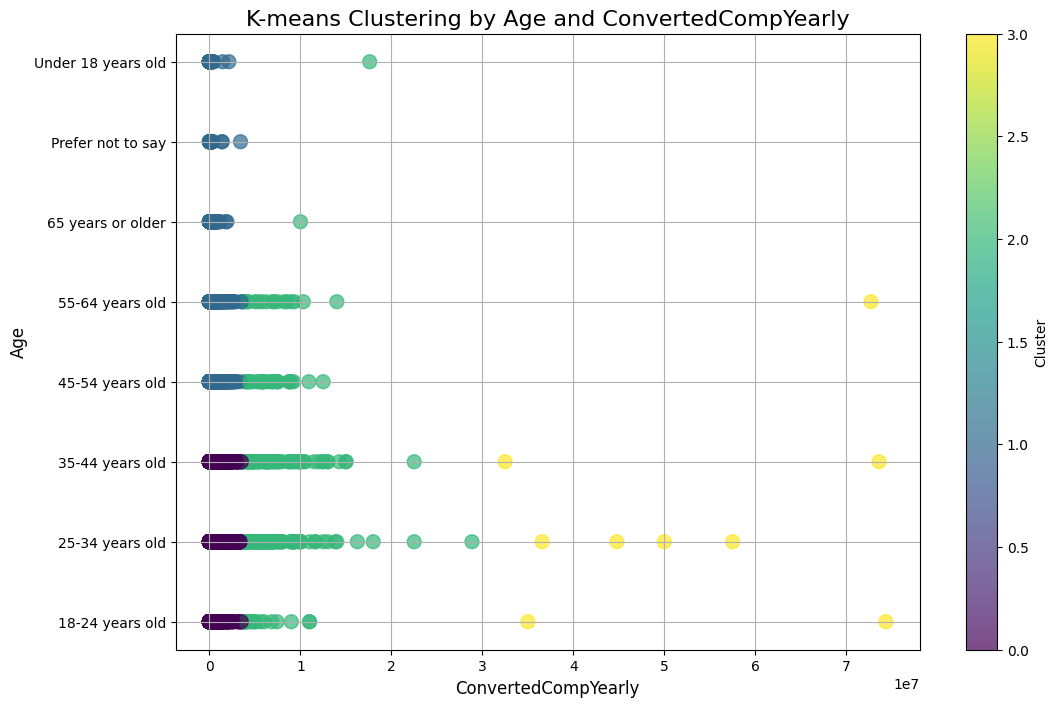

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Step 1: Prepare the data
df = data[['Age', 'ConvertedCompYearly']].dropna()  # Drop rows with missing values

# Encode 'Age' as numerical using LabelEncoder
label_encoder = LabelEncoder()
df['AgeEncoded'] = label_encoder.fit_transform(df['Age'])

# Step 2: Scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['AgeEncoded', 'ConvertedCompYearly']])

# Step 3: Use the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)  # Test for k=1 to k=10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Detect the "elbow" point
knee = KneeLocator(K, inertia, curve="convex", direction="decreasing")
optimal_clusters = knee.knee
print(f"The optimal number of clusters is: {optimal_clusters}")

# Step 4: Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Extract the mapping of encoded values to age groups
age_labels = label_encoder.classes_  # Original age group labels

# Step 5: Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['ConvertedCompYearly'],
    df['AgeEncoded'],
    c=df['Cluster'],
    cmap='viridis',
    s=100,
    alpha=0.7
)
plt.colorbar(scatter, label='Cluster')
plt.title('K-means Clustering by Age and ConvertedCompYearly', fontsize=16)
plt.xlabel('ConvertedCompYearly', fontsize=12)
plt.yticks(ticks=range(len(age_labels)), labels=age_labels)  # Replace y-axis ticks with age labels
plt.ylabel('Age', fontsize=12)
plt.grid(True)
plt.show()


In [5]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.64


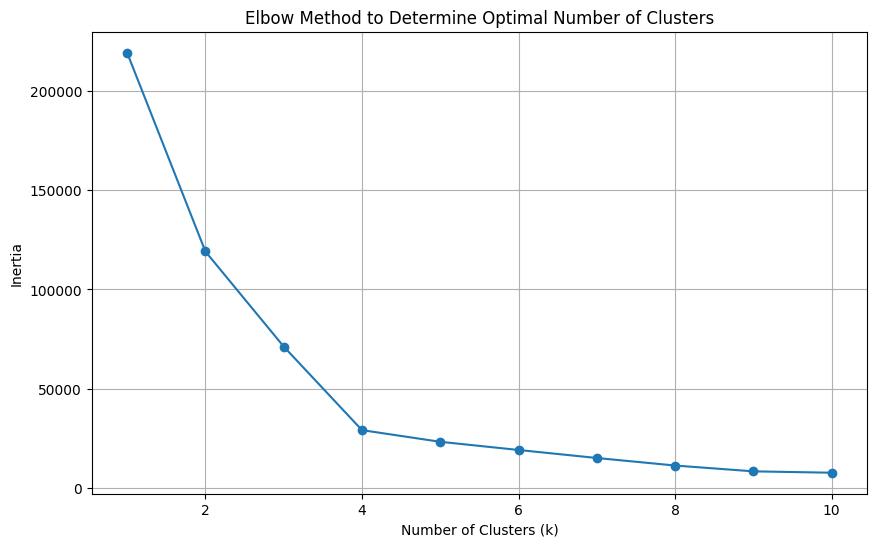

The optimal number of clusters is: 4


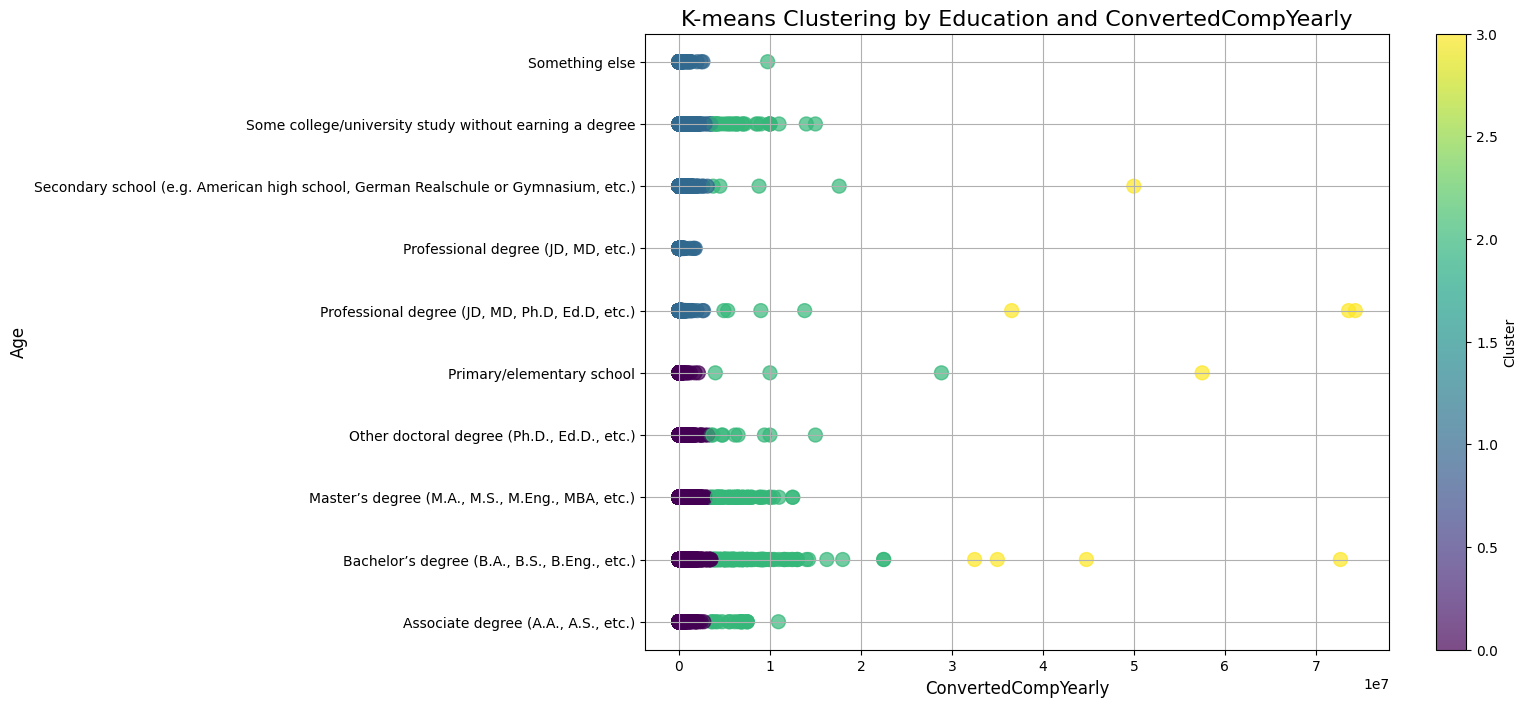

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Step 1: Prepare the data
df = data[['EdLevel', 'ConvertedCompYearly']].dropna()  # Drop rows with missing values

# Encode 'Age' as numerical using LabelEncoder
label_encoder = LabelEncoder()
df['EdLevelEncoded'] = label_encoder.fit_transform(df['EdLevel'])

# Step 2: Scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['EdLevelEncoded', 'ConvertedCompYearly']])

# Step 3: Use the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)  # Test for k=1 to k=10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Detect the "elbow" point
knee = KneeLocator(K, inertia, curve="convex", direction="decreasing")
optimal_clusters = knee.knee
print(f"The optimal number of clusters is: {optimal_clusters}")

# Step 4: Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Extract the mapping of encoded values to age groups
age_labels = label_encoder.classes_  # Original age group labels

# Step 5: Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['ConvertedCompYearly'],
    df['EdLevelEncoded'],
    c=df['Cluster'],
    cmap='viridis',
    s=100,
    alpha=0.7
)
plt.colorbar(scatter, label='Cluster')
plt.title('K-means Clustering by Education and ConvertedCompYearly', fontsize=16)
plt.xlabel('ConvertedCompYearly', fontsize=12)
plt.yticks(ticks=range(len(age_labels)), labels=age_labels)  # Replace y-axis ticks with age labels
plt.ylabel('Age', fontsize=12)
plt.grid(True)
plt.show()


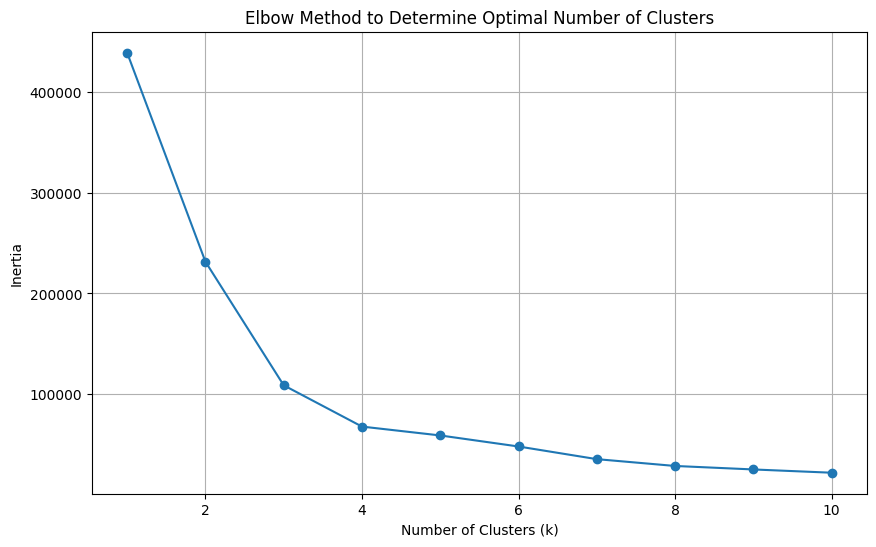

The optimal number of clusters is: 3


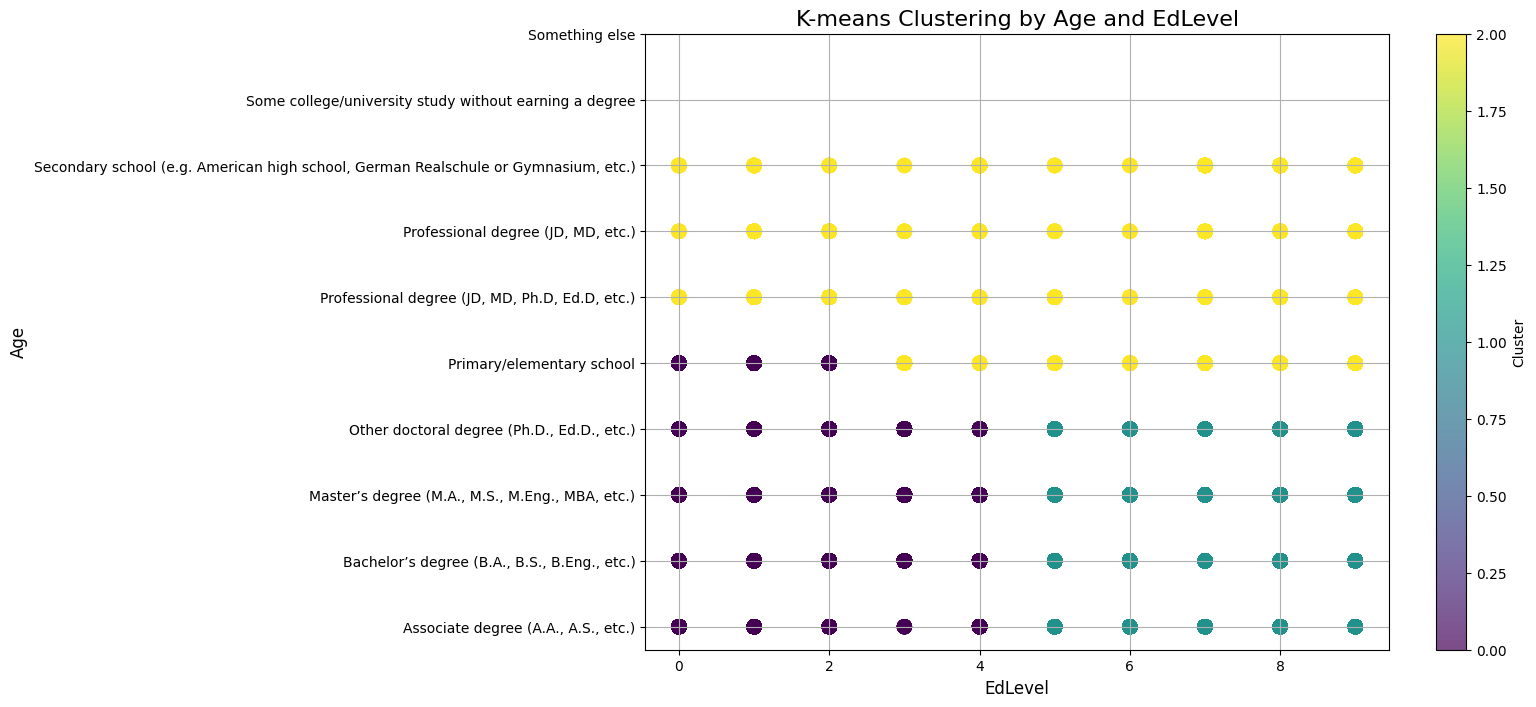

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Step 1: Prepare the data
df = data[['Age', 'EdLevel']].dropna()  # Drop rows with missing values

# Encode 'Age' as numerical using LabelEncoder
label_encoder = LabelEncoder()
df['AgeEncoded'] = label_encoder.fit_transform(df['Age'])
df['EdLevelEncoded'] = label_encoder.fit_transform(df['EdLevel'])

# Step 2: Scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['AgeEncoded', 'EdLevelEncoded']])

# Step 3: Use the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)  # Test for k=1 to k=10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Detect the "elbow" point
knee = KneeLocator(K, inertia, curve="convex", direction="decreasing")
optimal_clusters = knee.knee
print(f"The optimal number of clusters is: {optimal_clusters}")

# Step 4: Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Extract the mapping of encoded values to age groups
age_labels = label_encoder.classes_  # Original age group labels
edlevel_labels = label_encoder.classes_ # Original Education group labels

# Step 5: Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['EdLevelEncoded'],
    df['AgeEncoded'],
    c=df['Cluster'],
    cmap='viridis',
    s=100,
    alpha=0.7
)
plt.colorbar(scatter, label='Cluster')
plt.title('K-means Clustering by Age and EdLevel', fontsize=16)
plt.xlabel('EdLevel', fontsize=12)
plt.yticks(ticks=range(len(age_labels)), labels=age_labels)  # Replace y-axis ticks with age labels
plt.ylabel('Age', fontsize=12)
plt.grid(True)
plt.show()


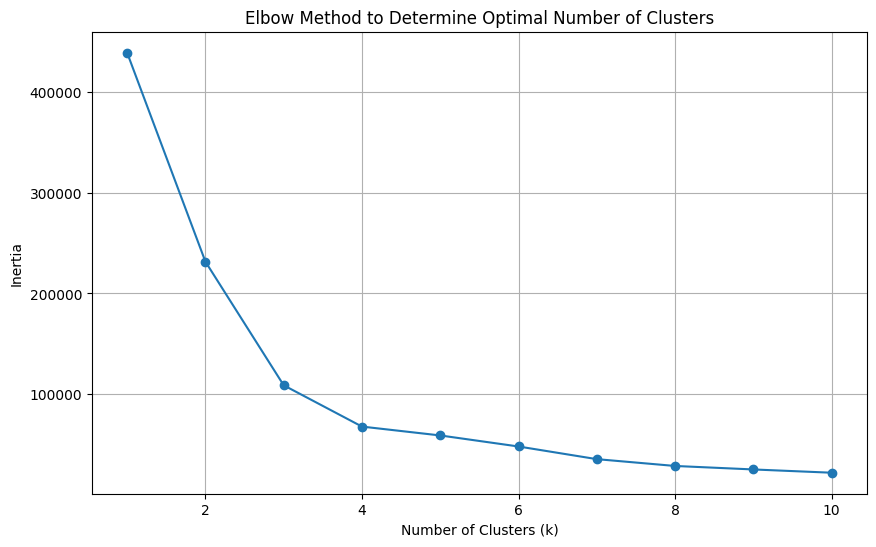

The optimal number of clusters is: 3


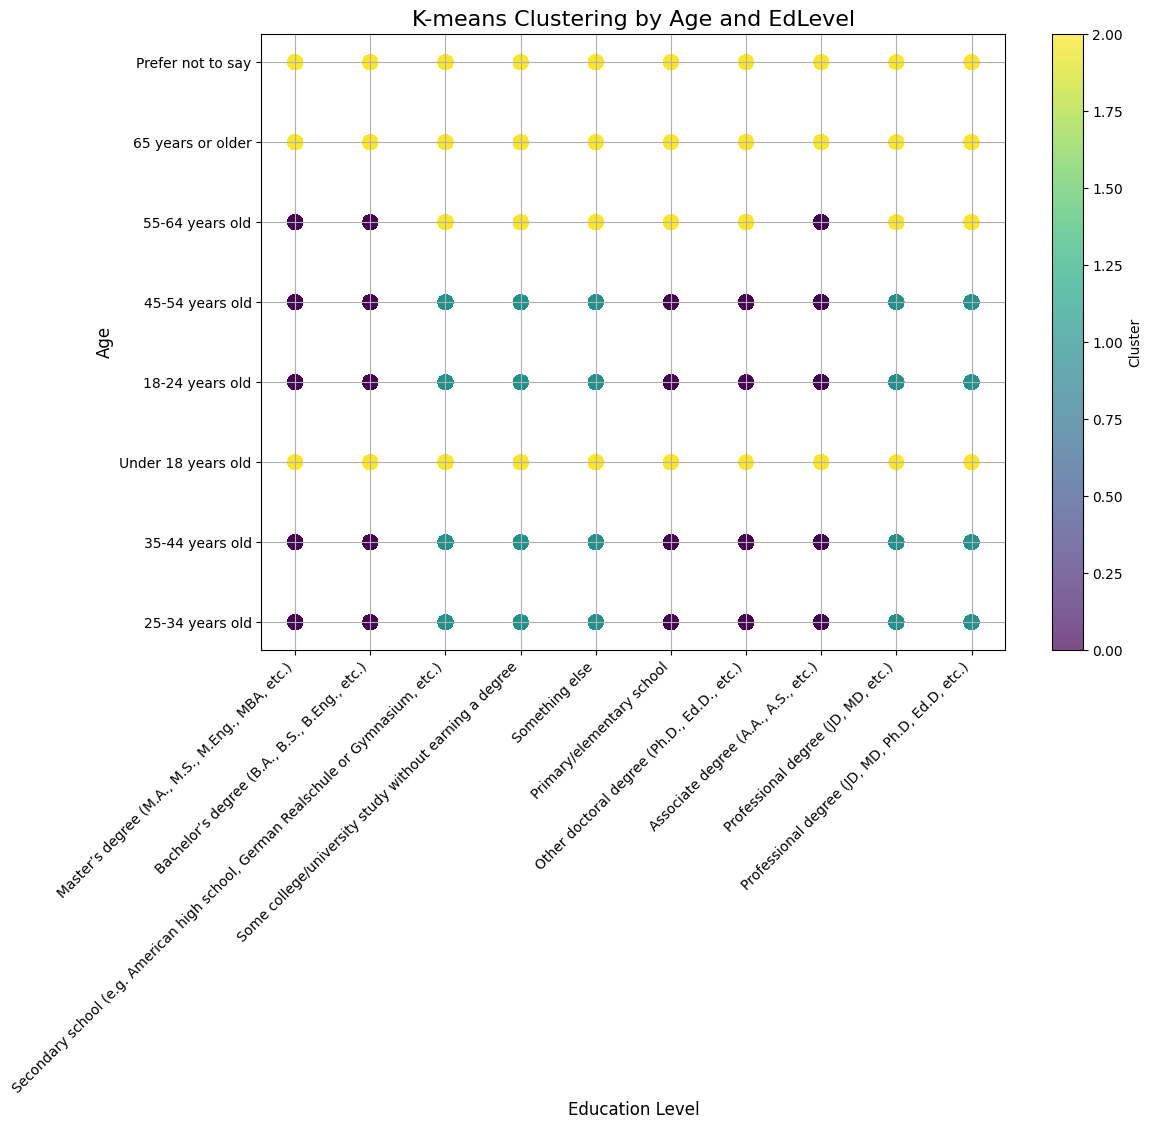

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Step 1: Prepare the data
df = data[['Age', 'EdLevel']].dropna()  # Drop rows with missing values

# Encode 'Age' and 'EdLevel' as numerical using LabelEncoder
age_label_encoder = LabelEncoder()
edlevel_label_encoder = LabelEncoder()
df['AgeEncoded'] = age_label_encoder.fit_transform(df['Age'])
df['EdLevelEncoded'] = edlevel_label_encoder.fit_transform(df['EdLevel'])

# Step 2: Scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['AgeEncoded', 'EdLevelEncoded']])

# Step 3: Use the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)  # Test for k=1 to k=10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Detect the "elbow" point
knee = KneeLocator(K, inertia, curve="convex", direction="decreasing")
optimal_clusters = knee.knee
print(f"The optimal number of clusters is: {optimal_clusters}")

# Step 4: Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 5: Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['EdLevel'],  # Original EdLevel values
    df['Age'],  # Original Age values
    c=df['Cluster'],
    cmap='viridis',
    s=100,
    alpha=0.7
)
plt.colorbar(scatter, label='Cluster')
plt.title('K-means Clustering by Age and EdLevel', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to avoid overlap
plt.grid(True)
plt.show()
